# **Seattle Airbnb Data Analysis**

### 1. Business Understanding
- The purpose of this study is to make a deep understanding of the price of Seattle Airbnb and to provide some insights for the hosts to
increase their income.
- In this study, the answers of the following three questions will be puesued

  **1.What is the busiest times of the year to visit Seattle? By how much do prices spike?**
   
    2.What factors have a relationship with the price of Seattle Airbnb?
   
    3.Is the performance of the hosts affectting the price of Seattle Airbnb?

### 2. Data Understanding

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_calendar = pd.read_csv('calendar.csv')

In [10]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [11]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


### 3. Prepare Data and Visualization

#### Delete all the columns with null values in the price column which will not affect the tendency of relationship of date and price. 

In [12]:
df_calendar=df_calendar.dropna(how='any')

In [13]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  934542 non-null  int64 
 1   date        934542 non-null  object
 2   available   934542 non-null  object
 3   price       934542 non-null  object
dtypes: int64(1), object(3)
memory usage: 35.6+ MB


#### Change the types of price column and date column in order to perform groupby easily.

In [14]:
def price_transform(col_):
    ''' Returns the input column without $-sings and as float-type 
    
    INPUT (pd.Series)
    OUTPUT (pd.Series)
    '''

    col = col_
    col = col.replace('[\$,]', '', regex=True).astype(float)
    return col

In [15]:
df_calendar['price']=price_transform(df_calendar['price'])
df_calendar['price']

0          85.0
1          85.0
9          85.0
10         85.0
14         85.0
           ... 
1393207    87.0
1393208    87.0
1393211    87.0
1393212    87.0
1393213    87.0
Name: price, Length: 934542, dtype: float64

In [16]:
df_calendar['date']=pd.to_datetime(df_calendar['date'])
df_calendar['date']

0         2016-01-04
1         2016-01-05
9         2016-01-13
10        2016-01-14
14        2016-01-18
             ...    
1393207   2016-01-06
1393208   2016-01-07
1393211   2016-01-10
1393212   2016-01-11
1393213   2016-01-12
Name: date, Length: 934542, dtype: datetime64[ns]

In [17]:
df=pd.concat([df_calendar['date'],df_calendar['price']],axis=1)

In [18]:
df

,date,price
0,2016-01-04,85.0
1,2016-01-05,85.0
9,2016-01-13,85.0
10,2016-01-14,85.0
14,2016-01-18,85.0
...,...,...
1393207,2016-01-06,87.0
1393208,2016-01-07,87.0
1393211,2016-01-10,87.0
1393212,2016-01-11,87.0


In [19]:
df2=df.groupby('date').mean()

In [20]:
df2

,price
date,
2016-01-04,122.085879
2016-01-05,120.681307
2016-01-06,120.928258
2016-01-07,120.958896
2016-01-08,127.640853
...,...
2016-12-29,138.045503
2016-12-30,144.738380
2016-12-31,145.698146


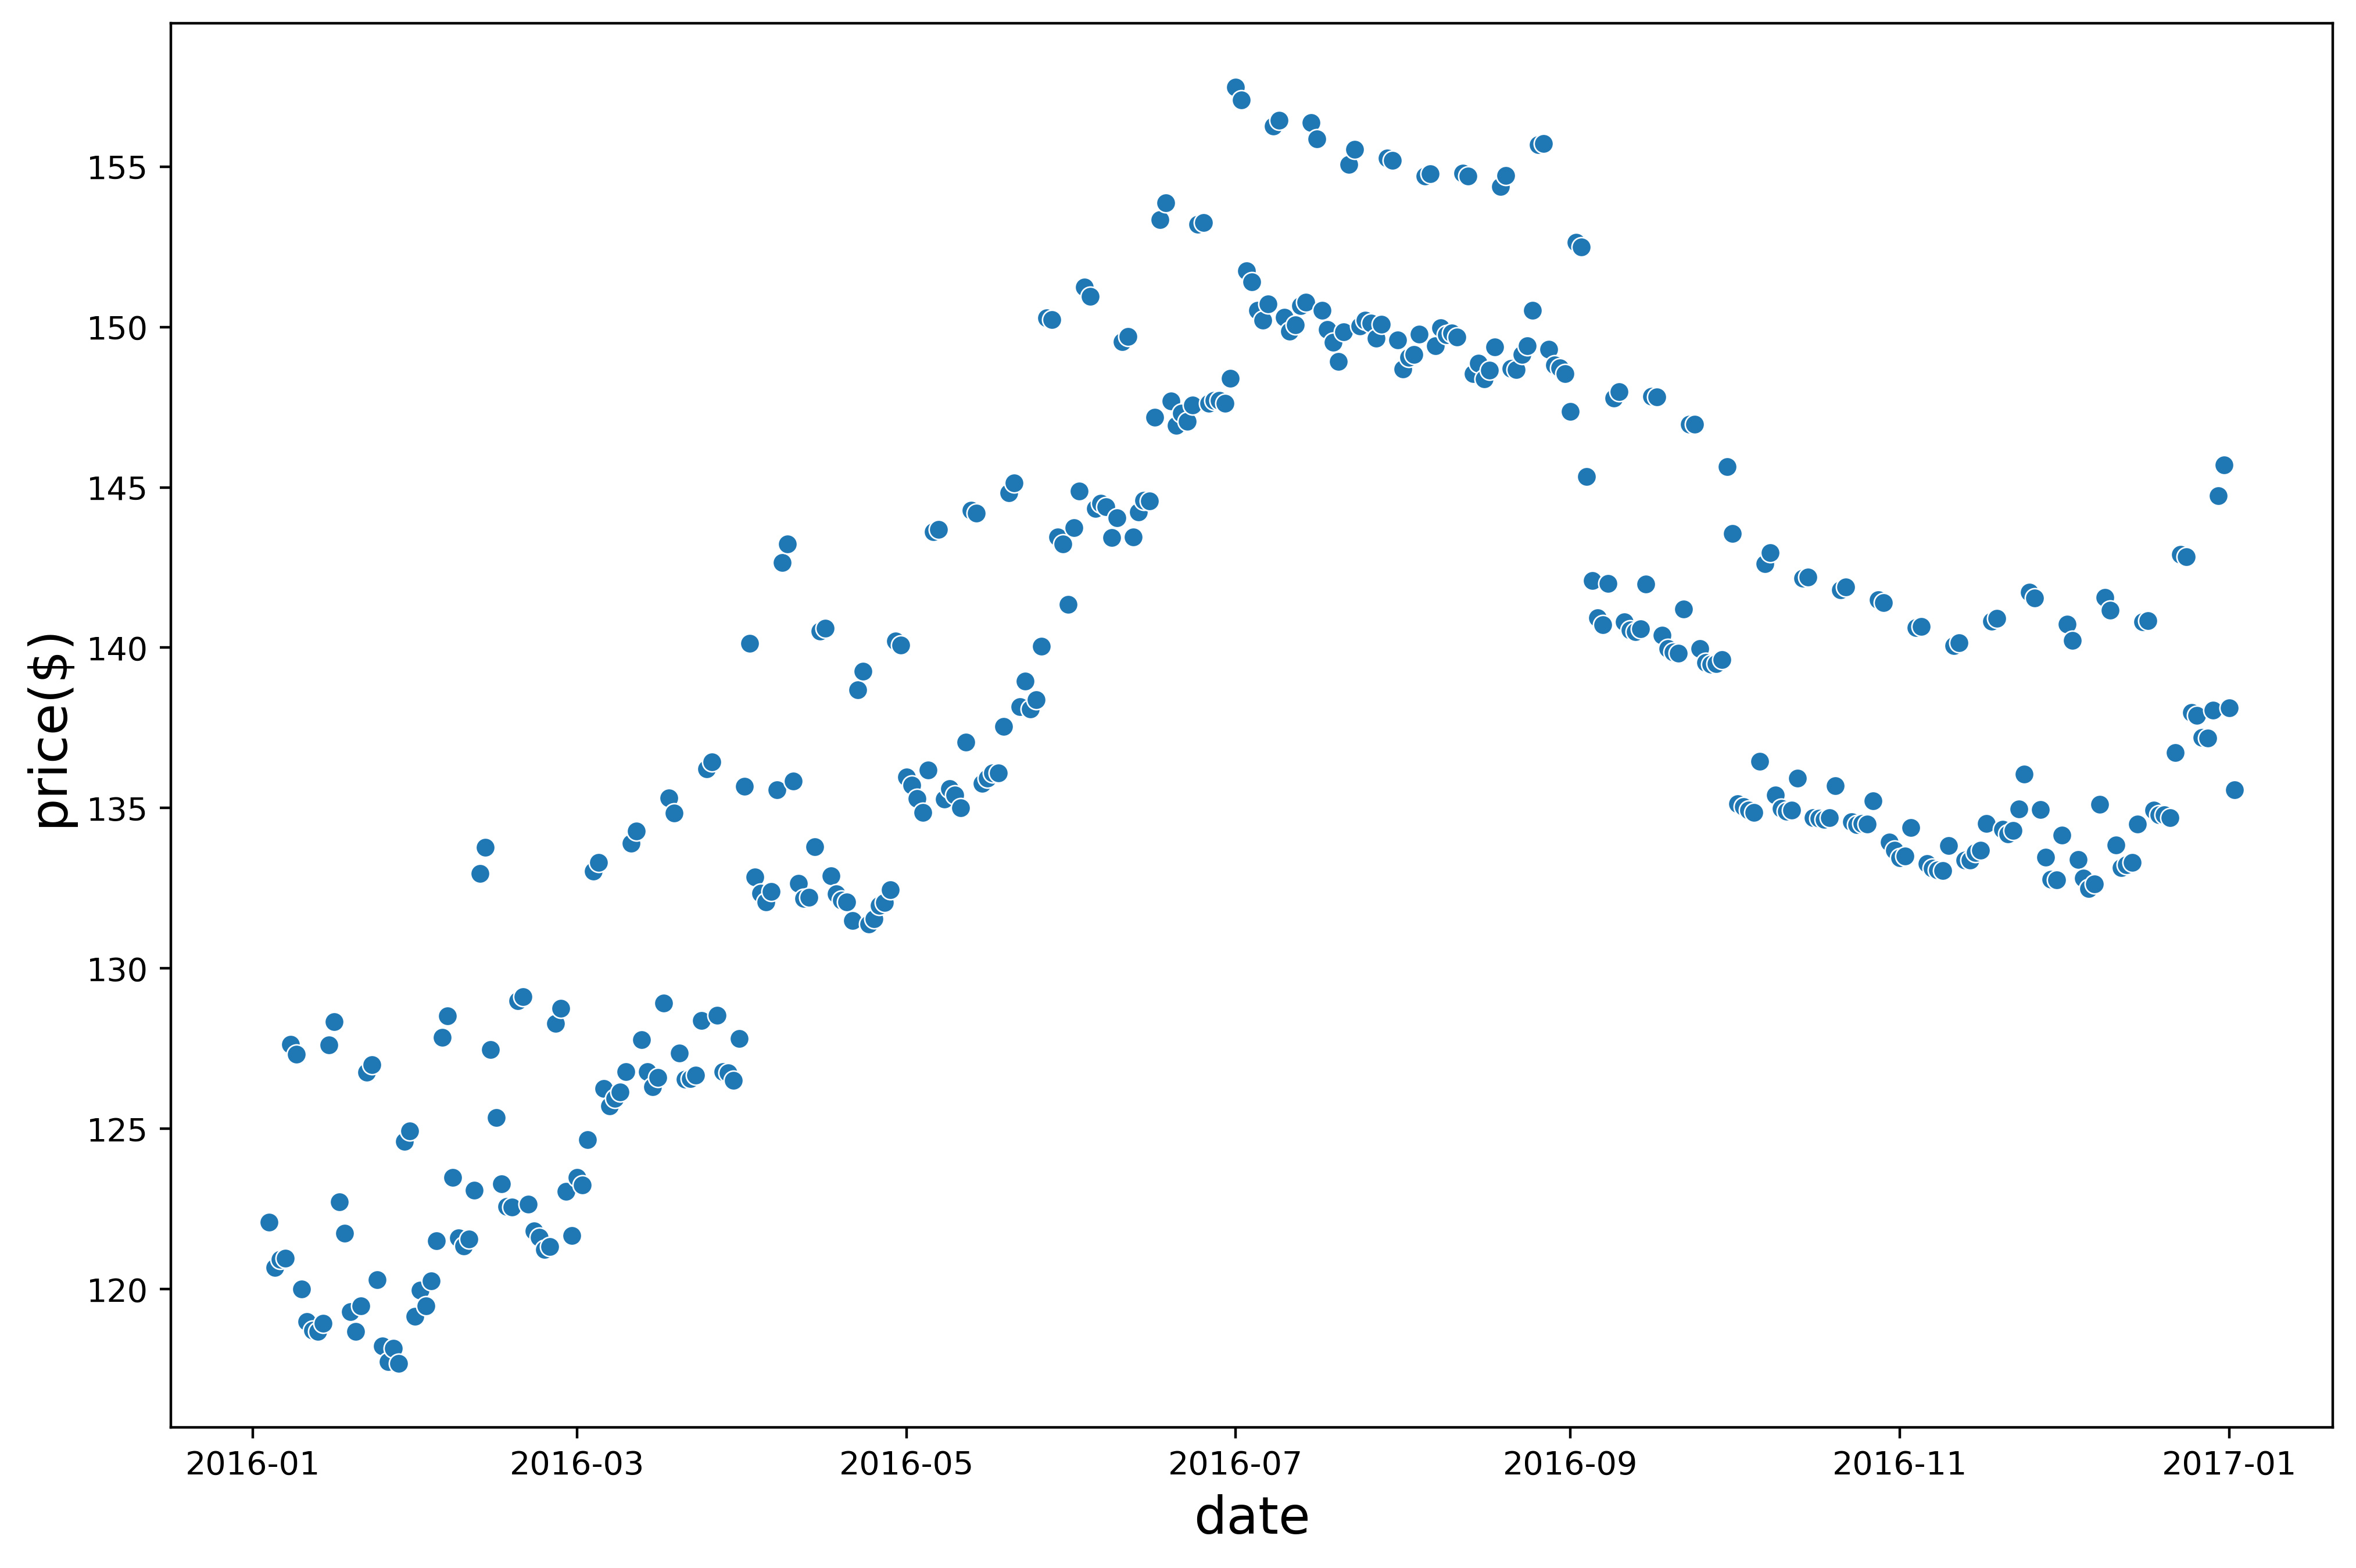

In [21]:
plt.figure(figsize=(12,8),dpi=400)
p=sns.scatterplot(x='date',y='price',data=df2)
p.set_xlabel('date',fontsize=16)
p.set_ylabel('price($)',fontsize=16)
plt.savefig('date_and_price.png')

- **The price increased greatly in summer. This indicates that the period of summer vacation is the busiest times of Seattle. However, it seems there are two categories throughout the all year so a weekday unit need to be investigate.**

In [22]:
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [23]:
df3=df2.groupby(pd.Grouper(freq='M')).mean()
df3

,price
date,
2016-01-31,121.692505
2016-02-29,124.315614
2016-03-31,128.640797
2016-04-30,135.109460
2016-05-31,139.539566
2016-06-30,147.469191
2016-07-31,152.102977
2016-08-31,150.657032
2016-09-30,143.277182


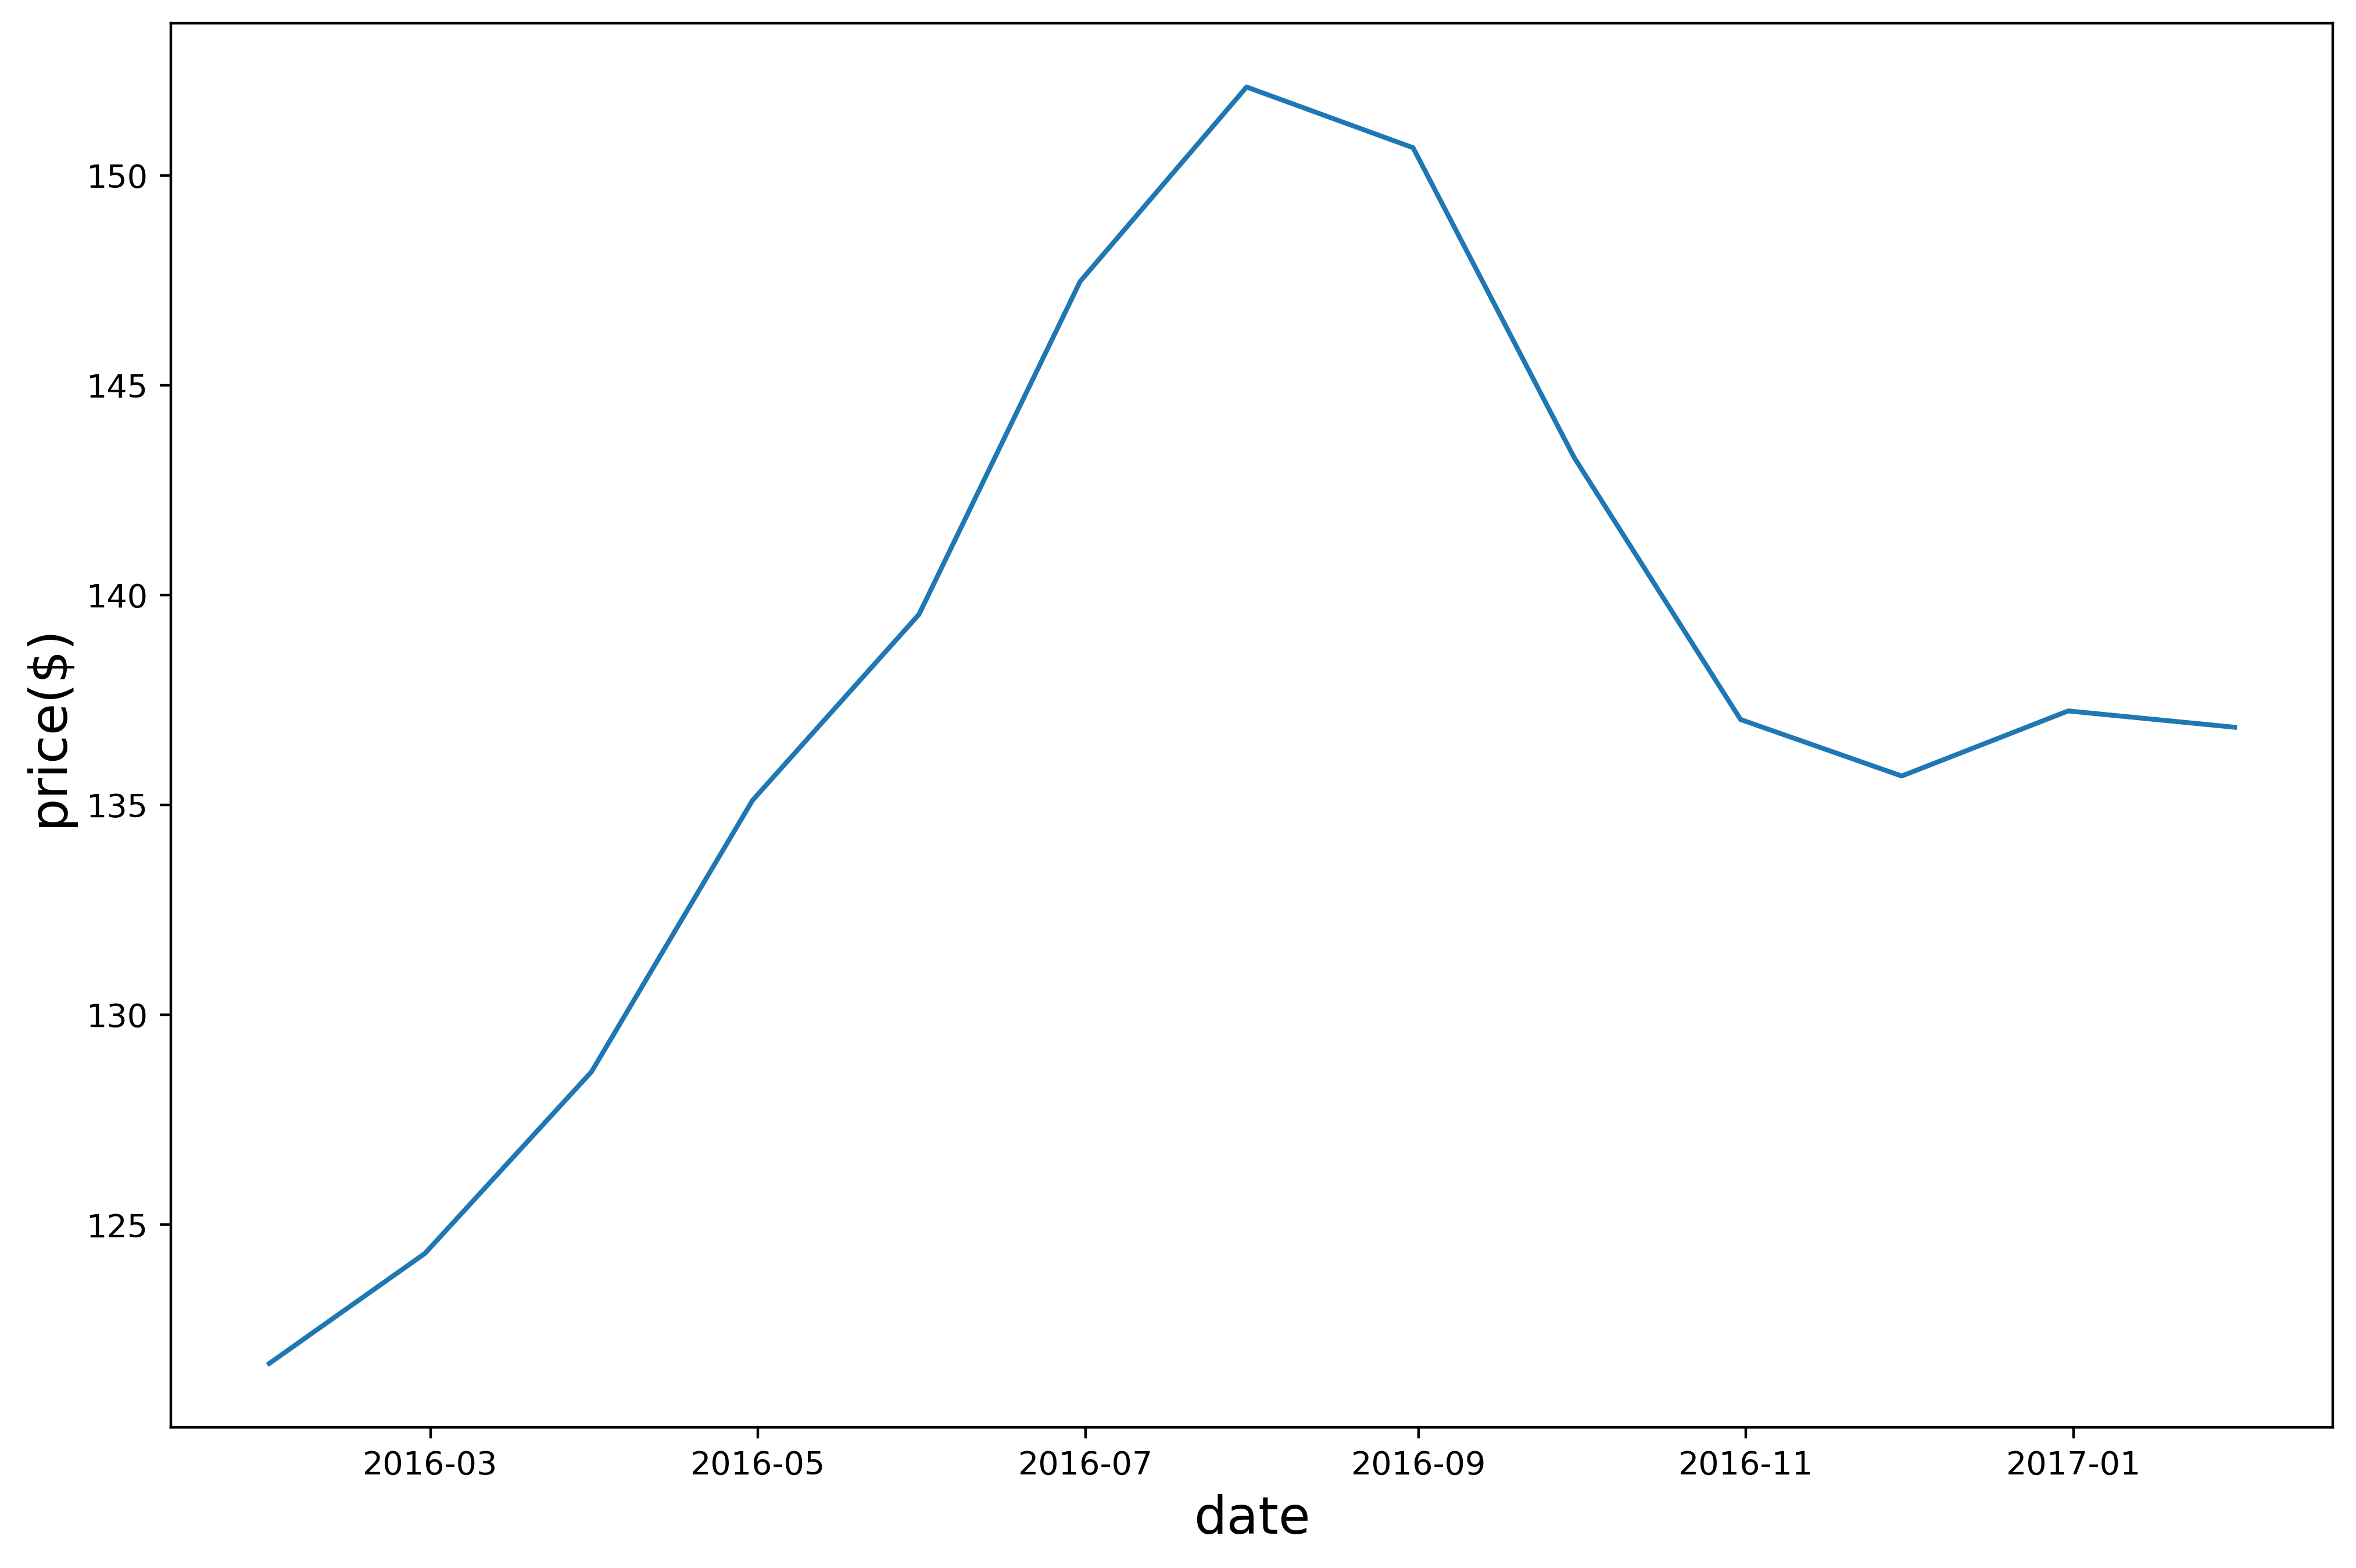

In [24]:
plt.figure(figsize=(12,8),dpi=400)
p=sns.lineplot(x='date',y='price',data=df3)
p.set_xlabel('date',fontsize=16)
p.set_ylabel('price($)',fontsize=16)
plt.savefig('date_and_price_2.png')

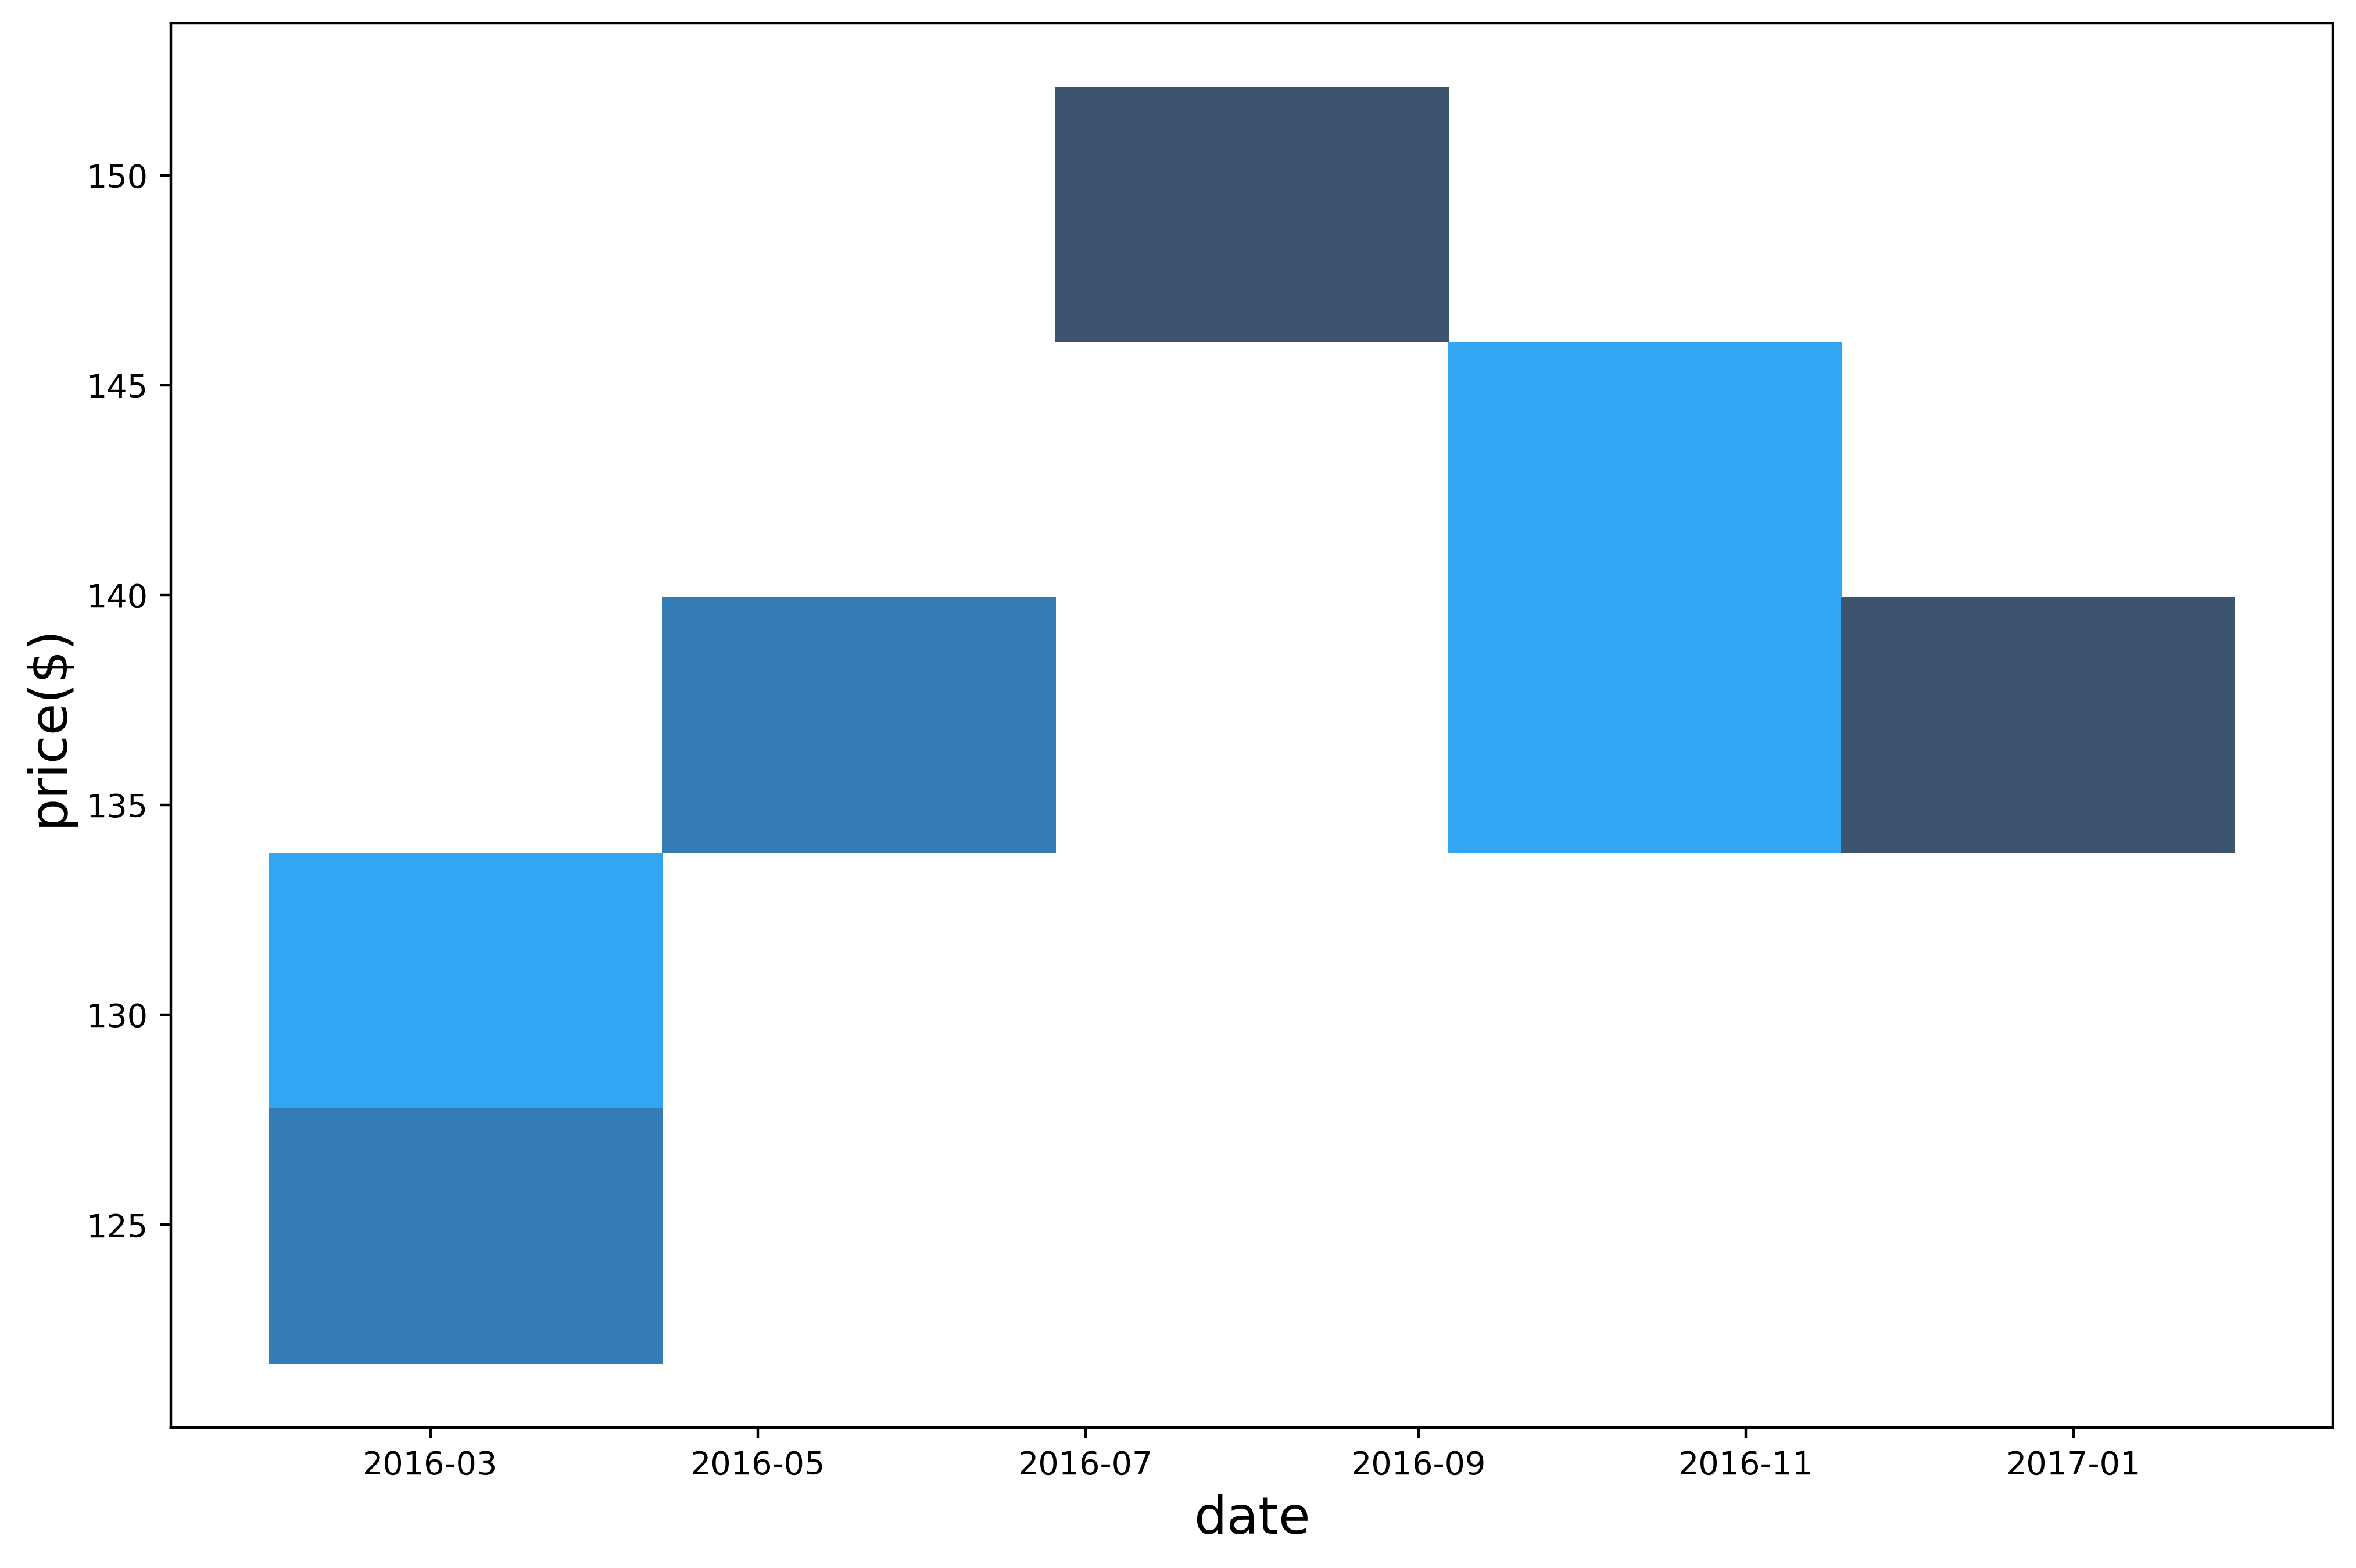

In [25]:
plt.figure(figsize=(12,8),dpi=400)
p=sns.histplot(x='date',y='price',data=df3)
p.set_xlabel('date',fontsize=16)
p.set_ylabel('price($)',fontsize=16)
plt.savefig('date_and_price_3.png')

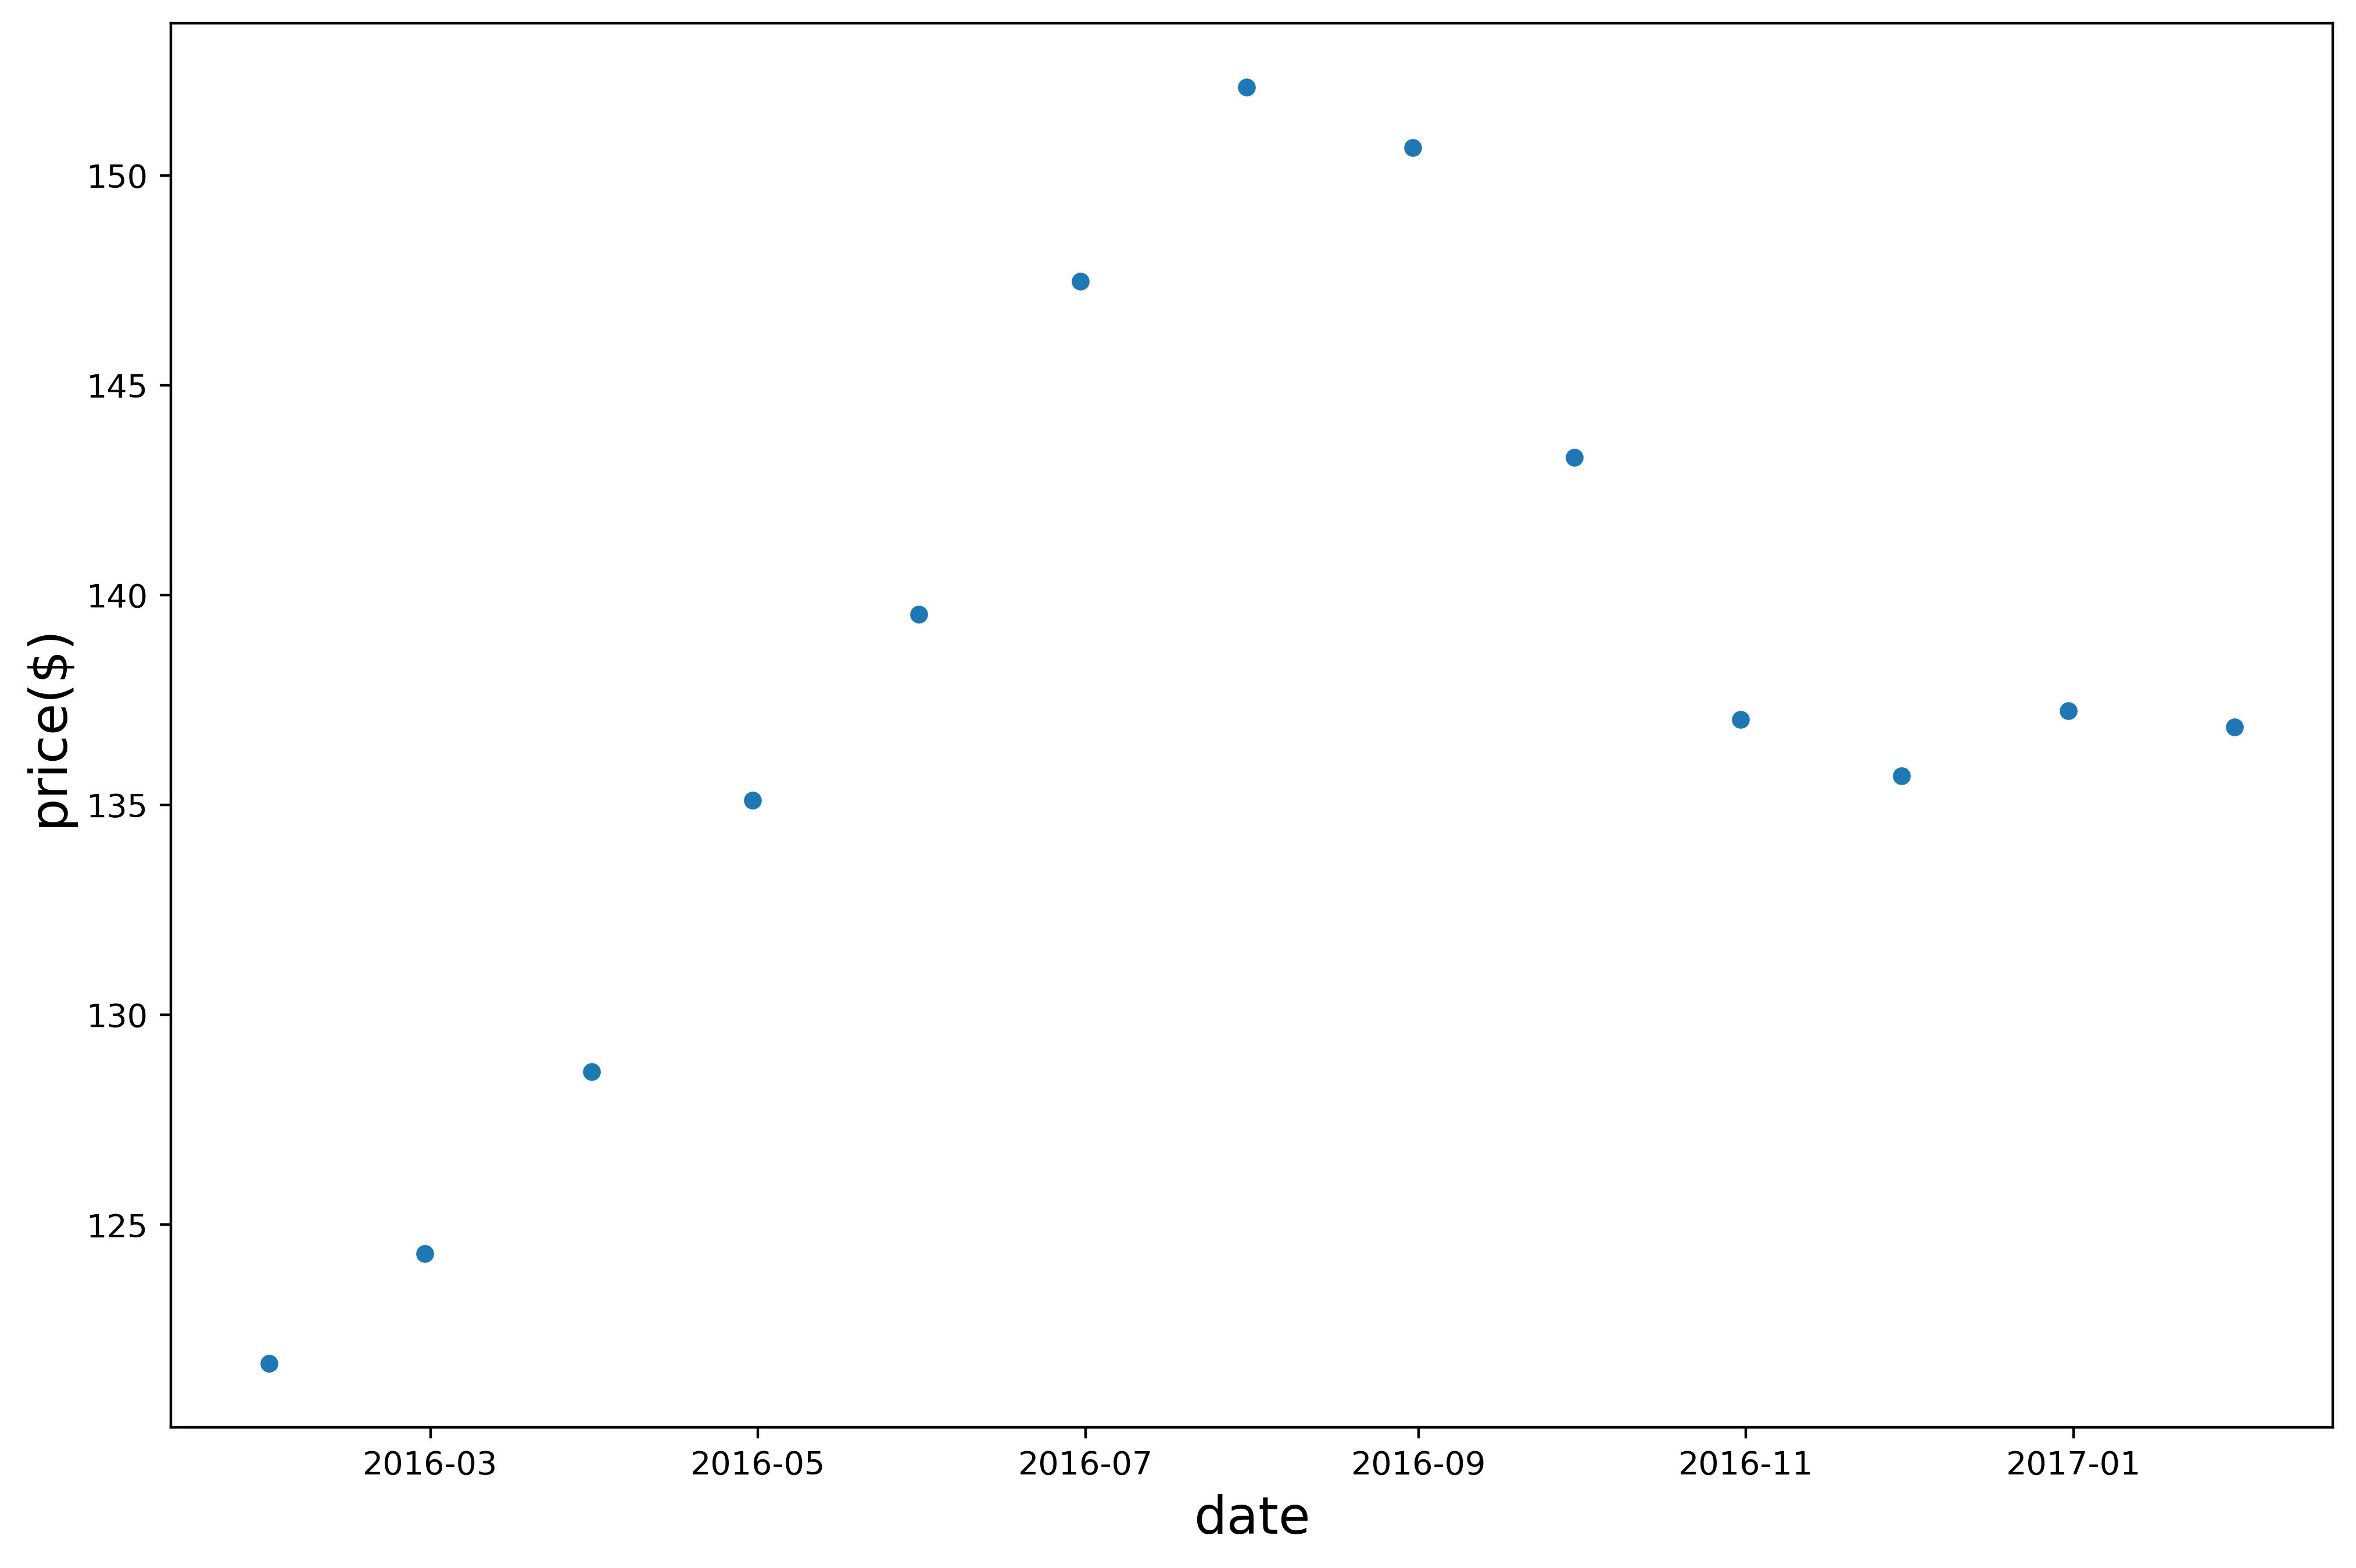

In [26]:
plt.figure(figsize=(12,8),dpi=400)
p=sns.scatterplot(x='date',y='price',data=df3)
p.set_xlabel('date',fontsize=16)
p.set_ylabel('price($)',fontsize=16)
plt.savefig('date_and_price_4.png')

In [27]:
df4=df2.groupby(pd.Grouper(freq='W-SUN')).mean()
df4

,price
date,
2016-01-10,122.804001
2016-01-17,121.999434
2016-01-24,121.894993
2016-01-31,120.071592
2016-02-07,123.011431
2016-02-14,125.972717
2016-02-21,124.932039
2016-02-28,123.723688
2016-03-06,126.524755


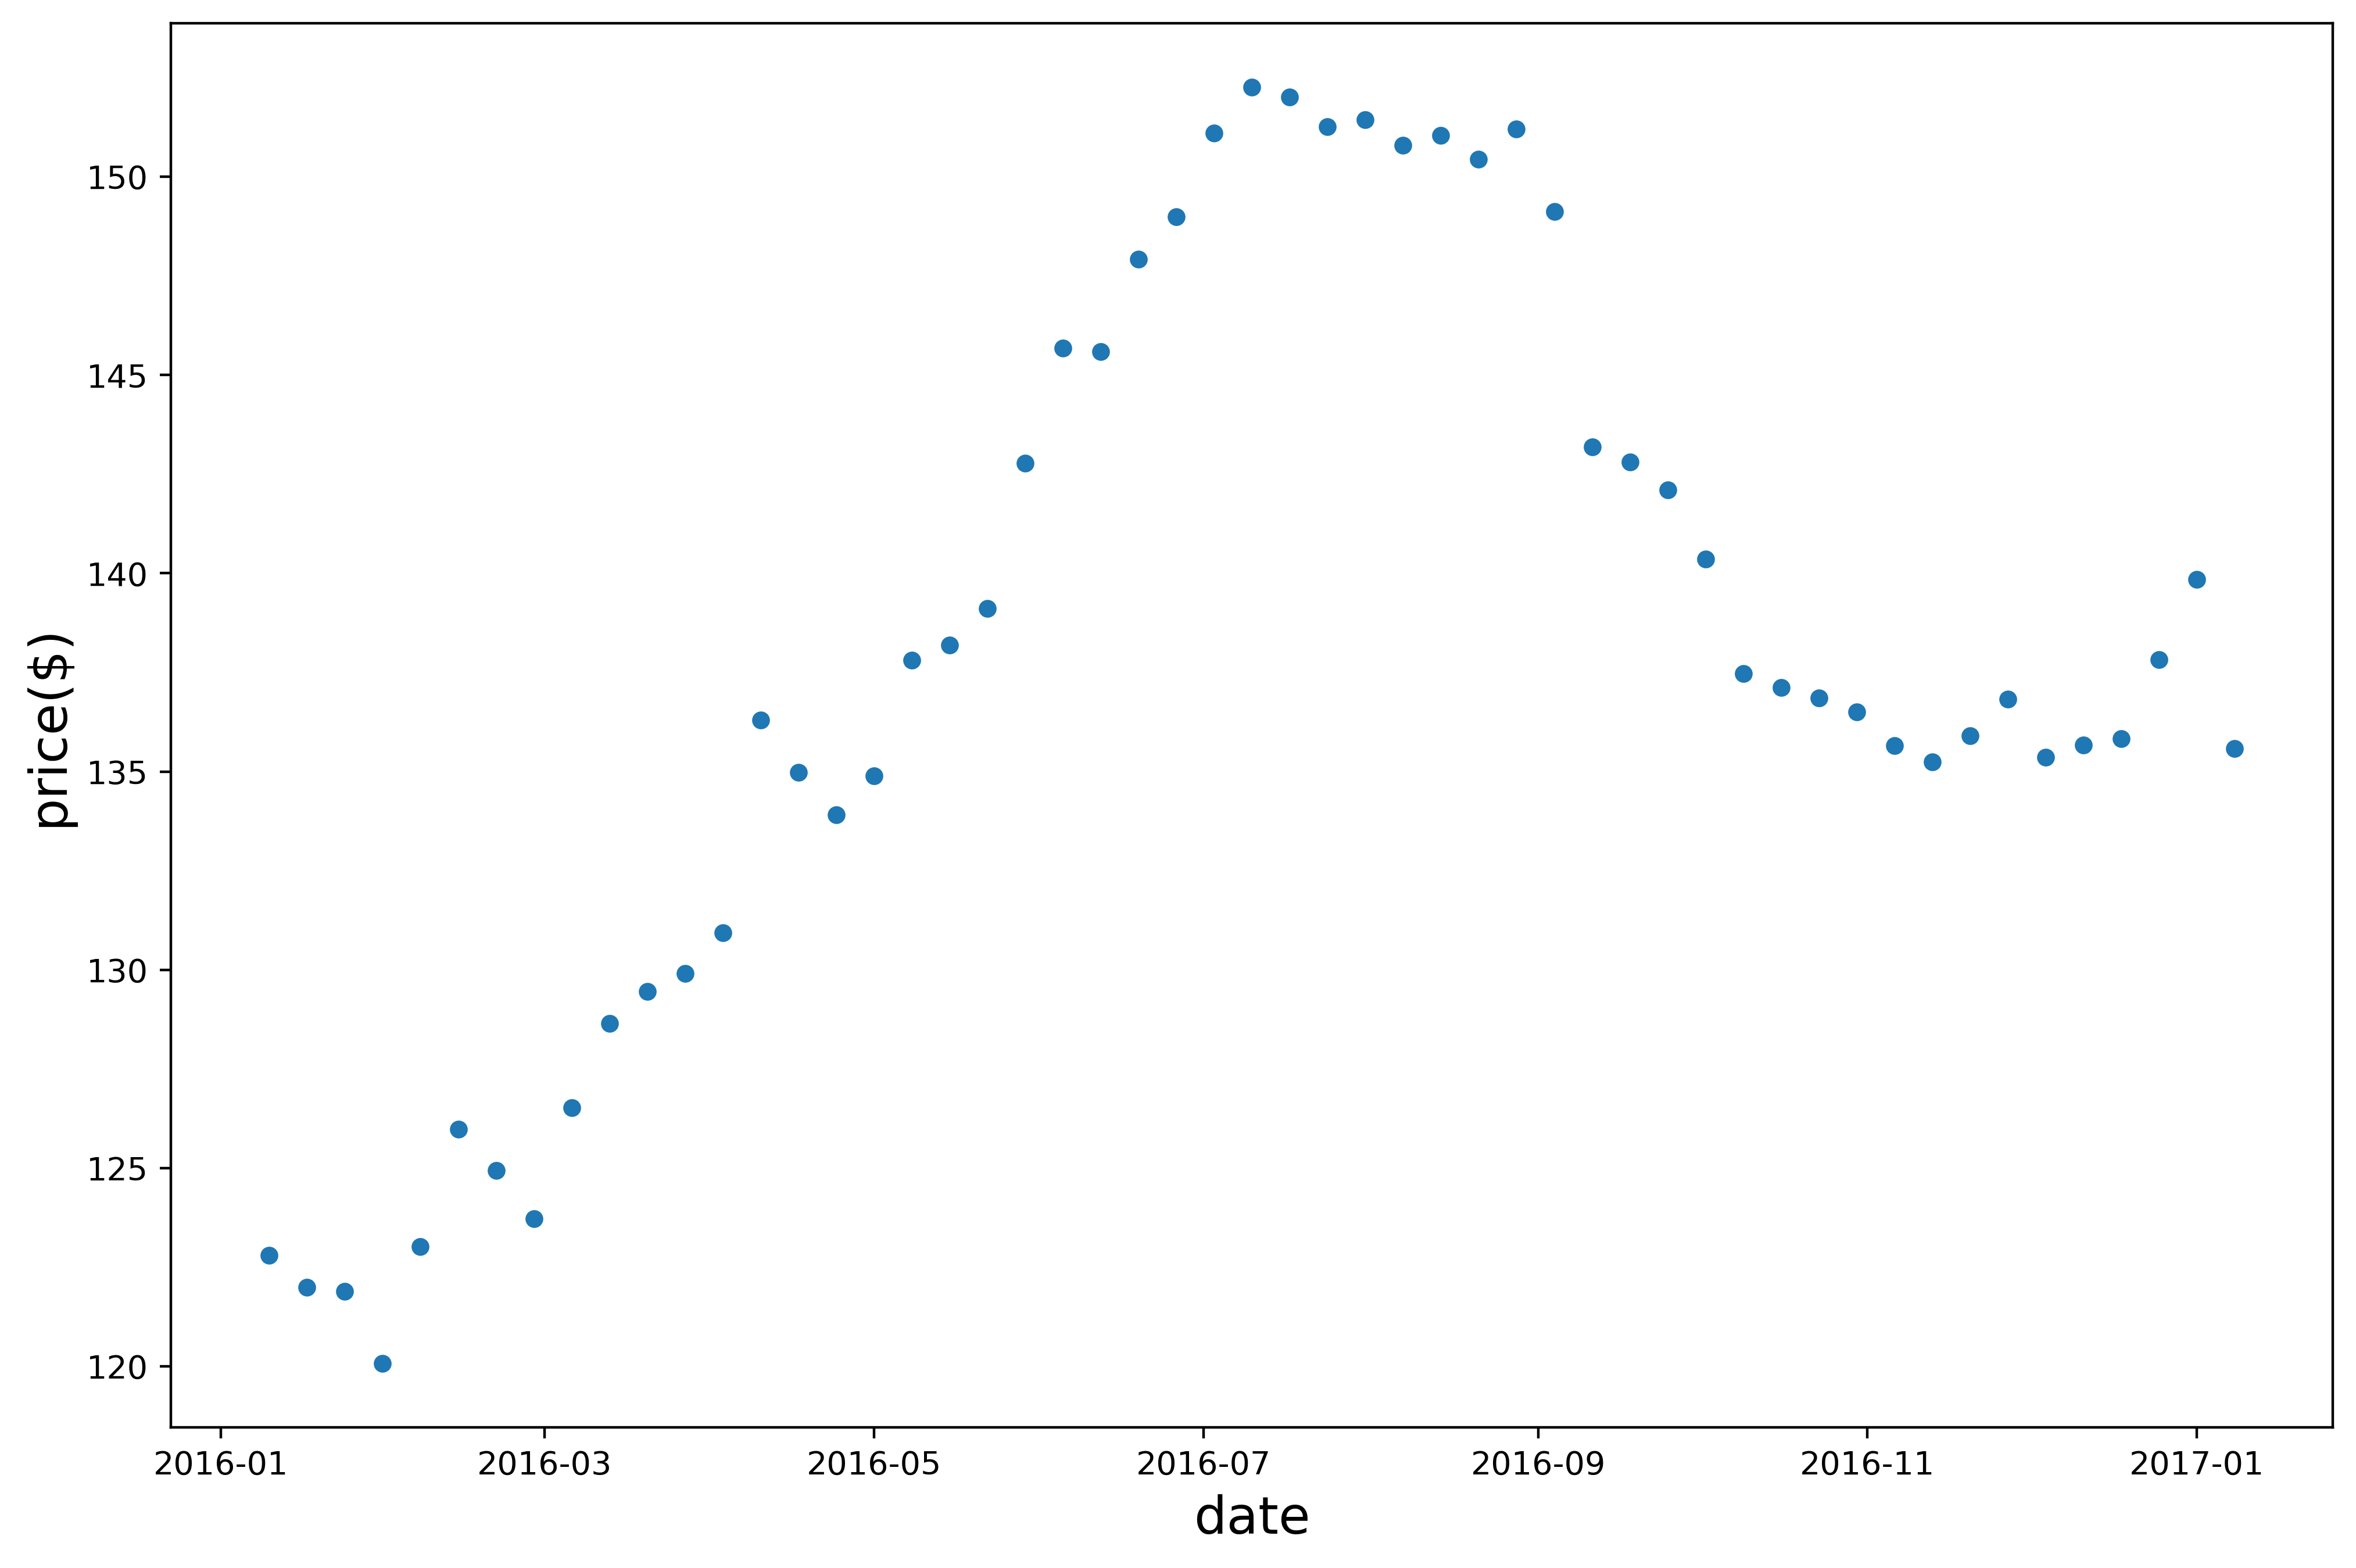

In [28]:
plt.figure(figsize=(12,8),dpi=400)
p=sns.scatterplot(x='date',y='price',data=df4)
p.set_xlabel('date',fontsize=16)
p.set_ylabel('price($)',fontsize=16)
plt.savefig('date_and_price_5.png')

- **The average prices of month unit and week unit show the same tendency to the date unit.**

In [29]:
df['date'].dt.dayofweek

0          0
1          1
9          2
10         3
14         0
          ..
1393207    2
1393208    3
1393211    6
1393212    0
1393213    1
Name: date, Length: 934542, dtype: int64

In [30]:
df['day_of_week']=df['date'].dt.dayofweek

In [31]:
df

,date,price,day_of_week
0,2016-01-04,85.0,0
1,2016-01-05,85.0,1
9,2016-01-13,85.0,2
10,2016-01-14,85.0,3
14,2016-01-18,85.0,0
...,...,...,...
1393207,2016-01-06,87.0,2
1393208,2016-01-07,87.0,3
1393211,2016-01-10,87.0,6
1393212,2016-01-11,87.0,0


In [32]:
df.dtypes

date           datetime64[ns]
price                 float64
day_of_week             int64
dtype: object

In [33]:
df5=df.groupby('day_of_week').mean()

In [34]:
df5.head()

,price
day_of_week,
0,135.676414
1,135.408764
2,135.447880
3,136.476032
4,143.036294


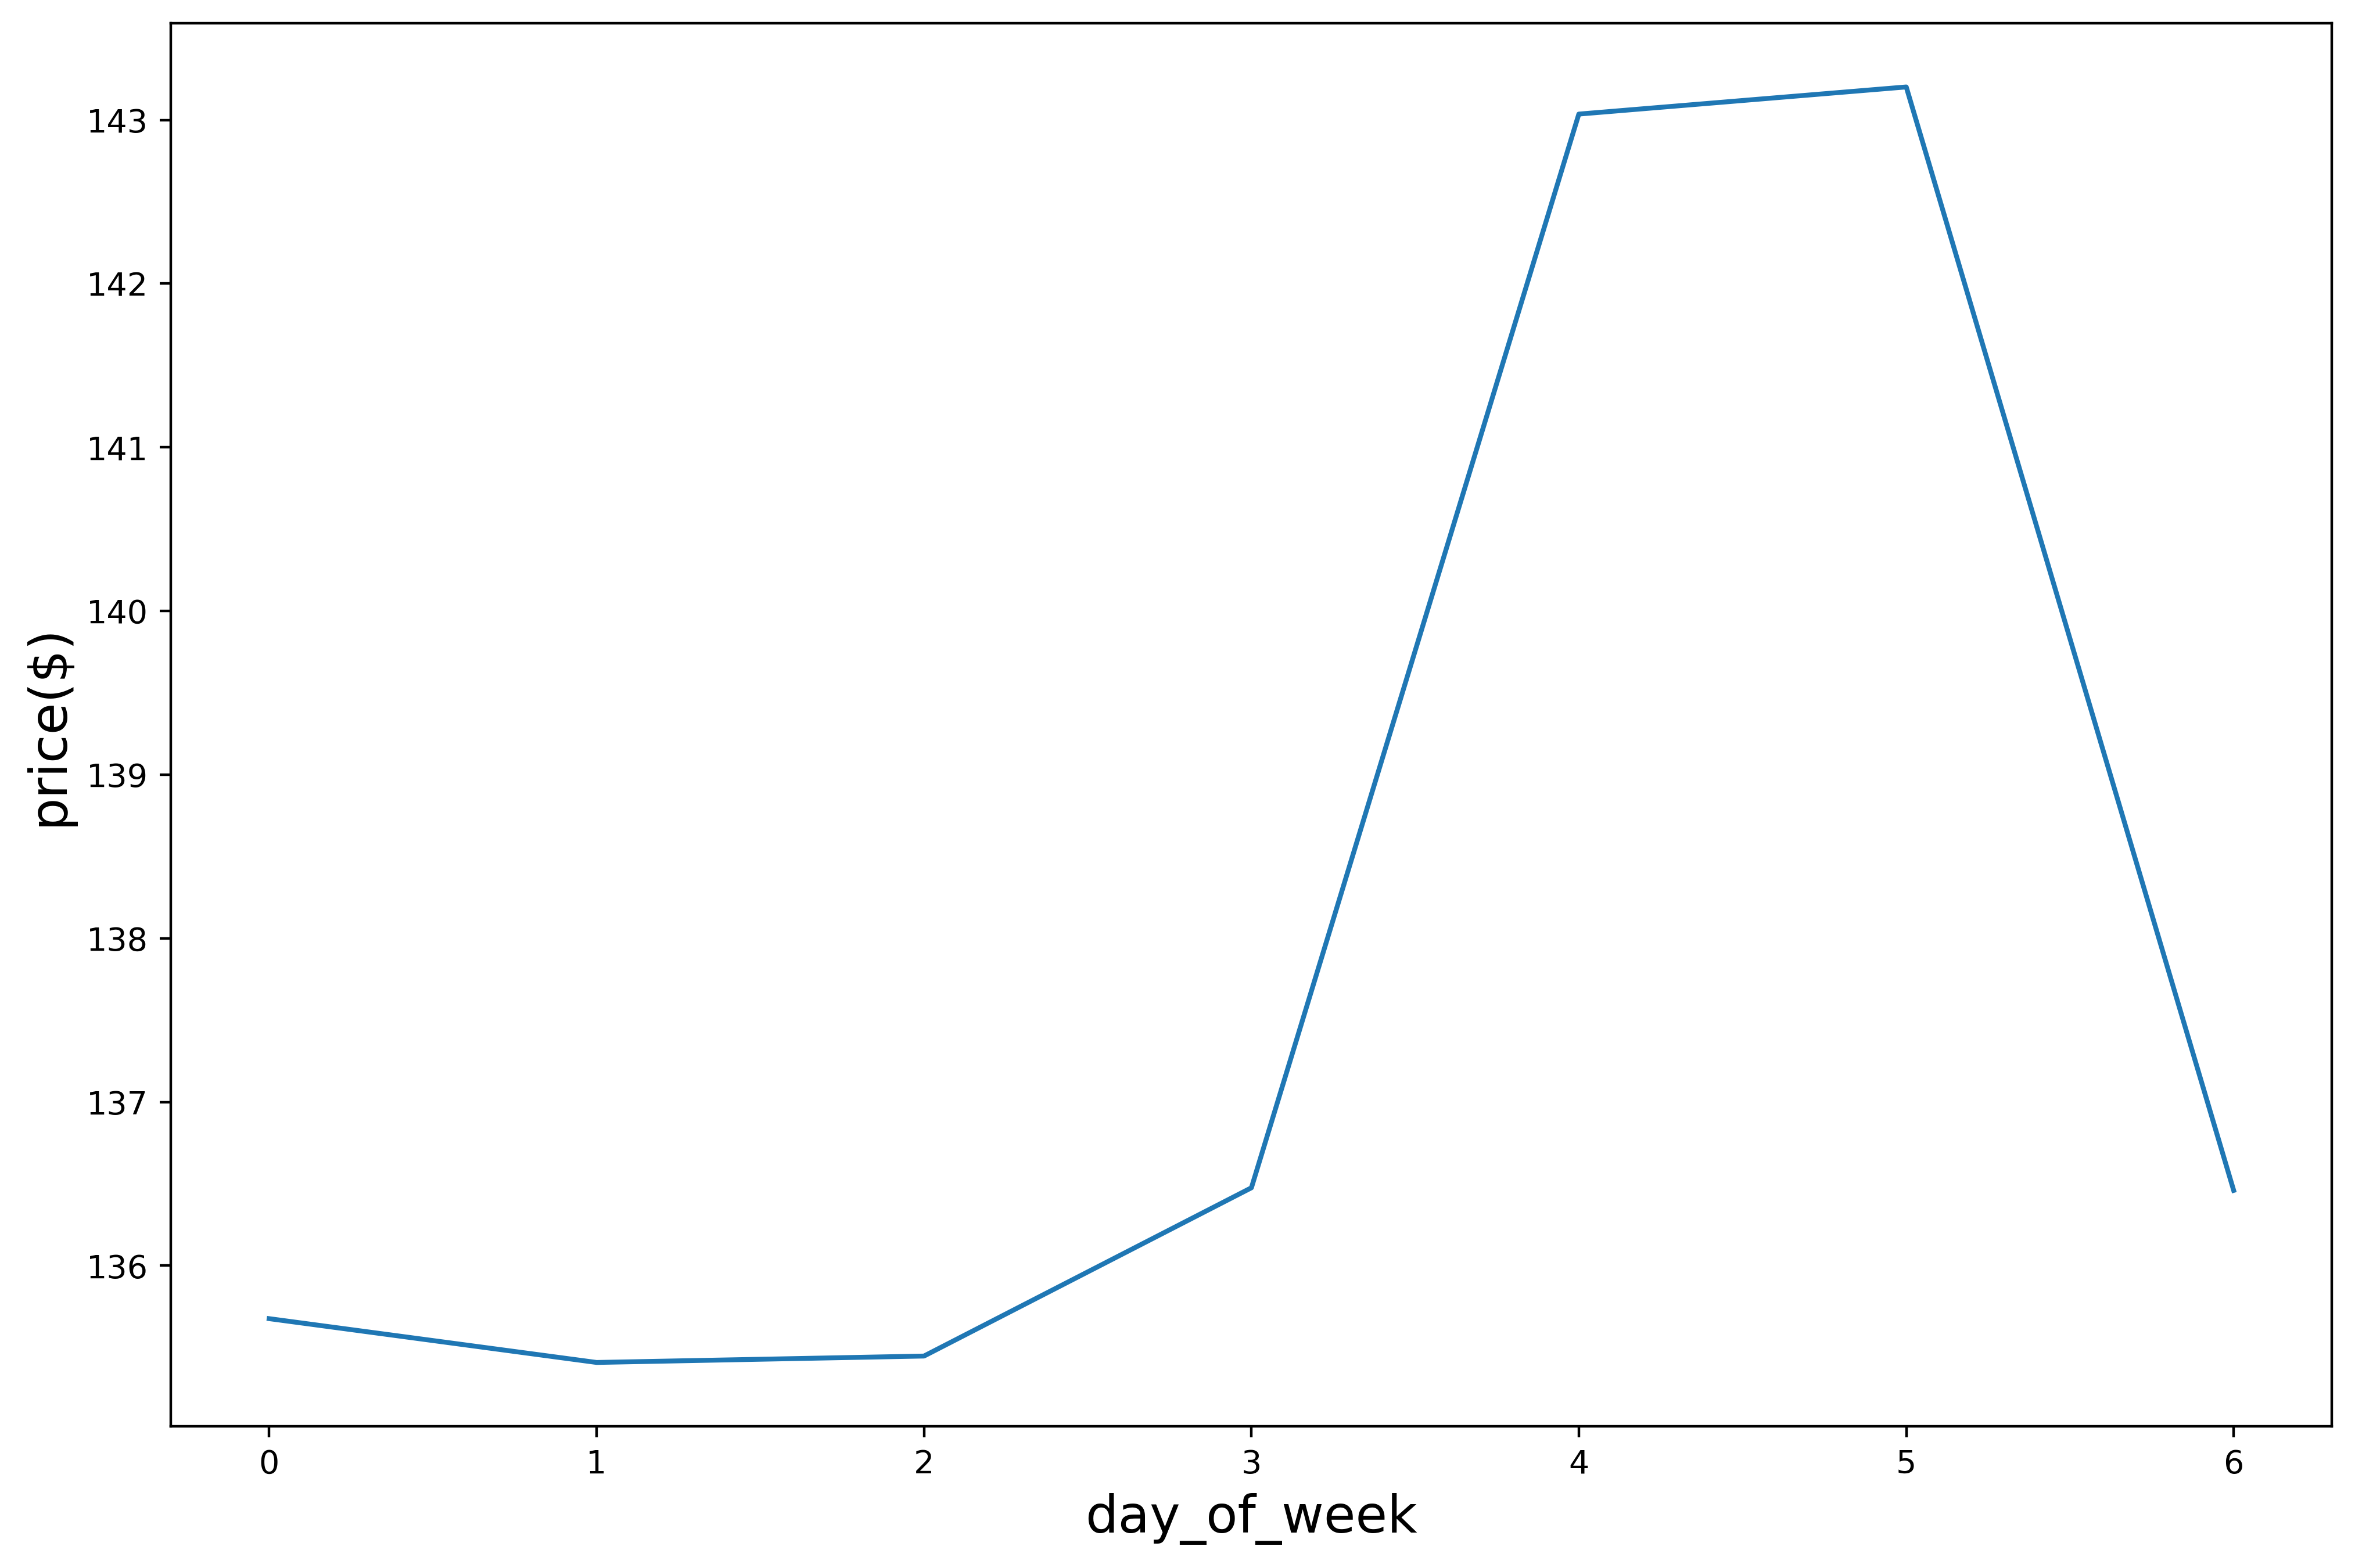

In [35]:
plt.figure(figsize=(12,8),dpi=400)
p=sns.lineplot(x='day_of_week',y='price',data=df5)
p.set_xlabel('day_of_week',fontsize=16)
p.set_ylabel('price($)',fontsize=16)
plt.savefig('day_of_week_and_price_6.png')

In [36]:
df['day_of_week_2']=df['date'].dt.strftime('%a')

In [37]:
df

,date,price,day_of_week,day_of_week_2
0,2016-01-04,85.0,0,Mon
1,2016-01-05,85.0,1,Tue
9,2016-01-13,85.0,2,Wed
10,2016-01-14,85.0,3,Thu
14,2016-01-18,85.0,0,Mon
...,...,...,...,...
1393207,2016-01-06,87.0,2,Wed
1393208,2016-01-07,87.0,3,Thu
1393211,2016-01-10,87.0,6,Sun
1393212,2016-01-11,87.0,0,Mon


In [38]:
df6=df.drop(['date','day_of_week'],axis=1)

In [39]:
df6.head()

,price,day_of_week_2
0,85.0,Mon
1,85.0,Tue
9,85.0,Wed
10,85.0,Thu
14,85.0,Mon


In [40]:
df6.groupby('day_of_week_2').mean()

,price
day_of_week_2,
Fri,143.036294
Mon,135.676414
Sat,143.202136
Sun,136.459941
Thu,136.476032
Tue,135.408764
Wed,135.447880


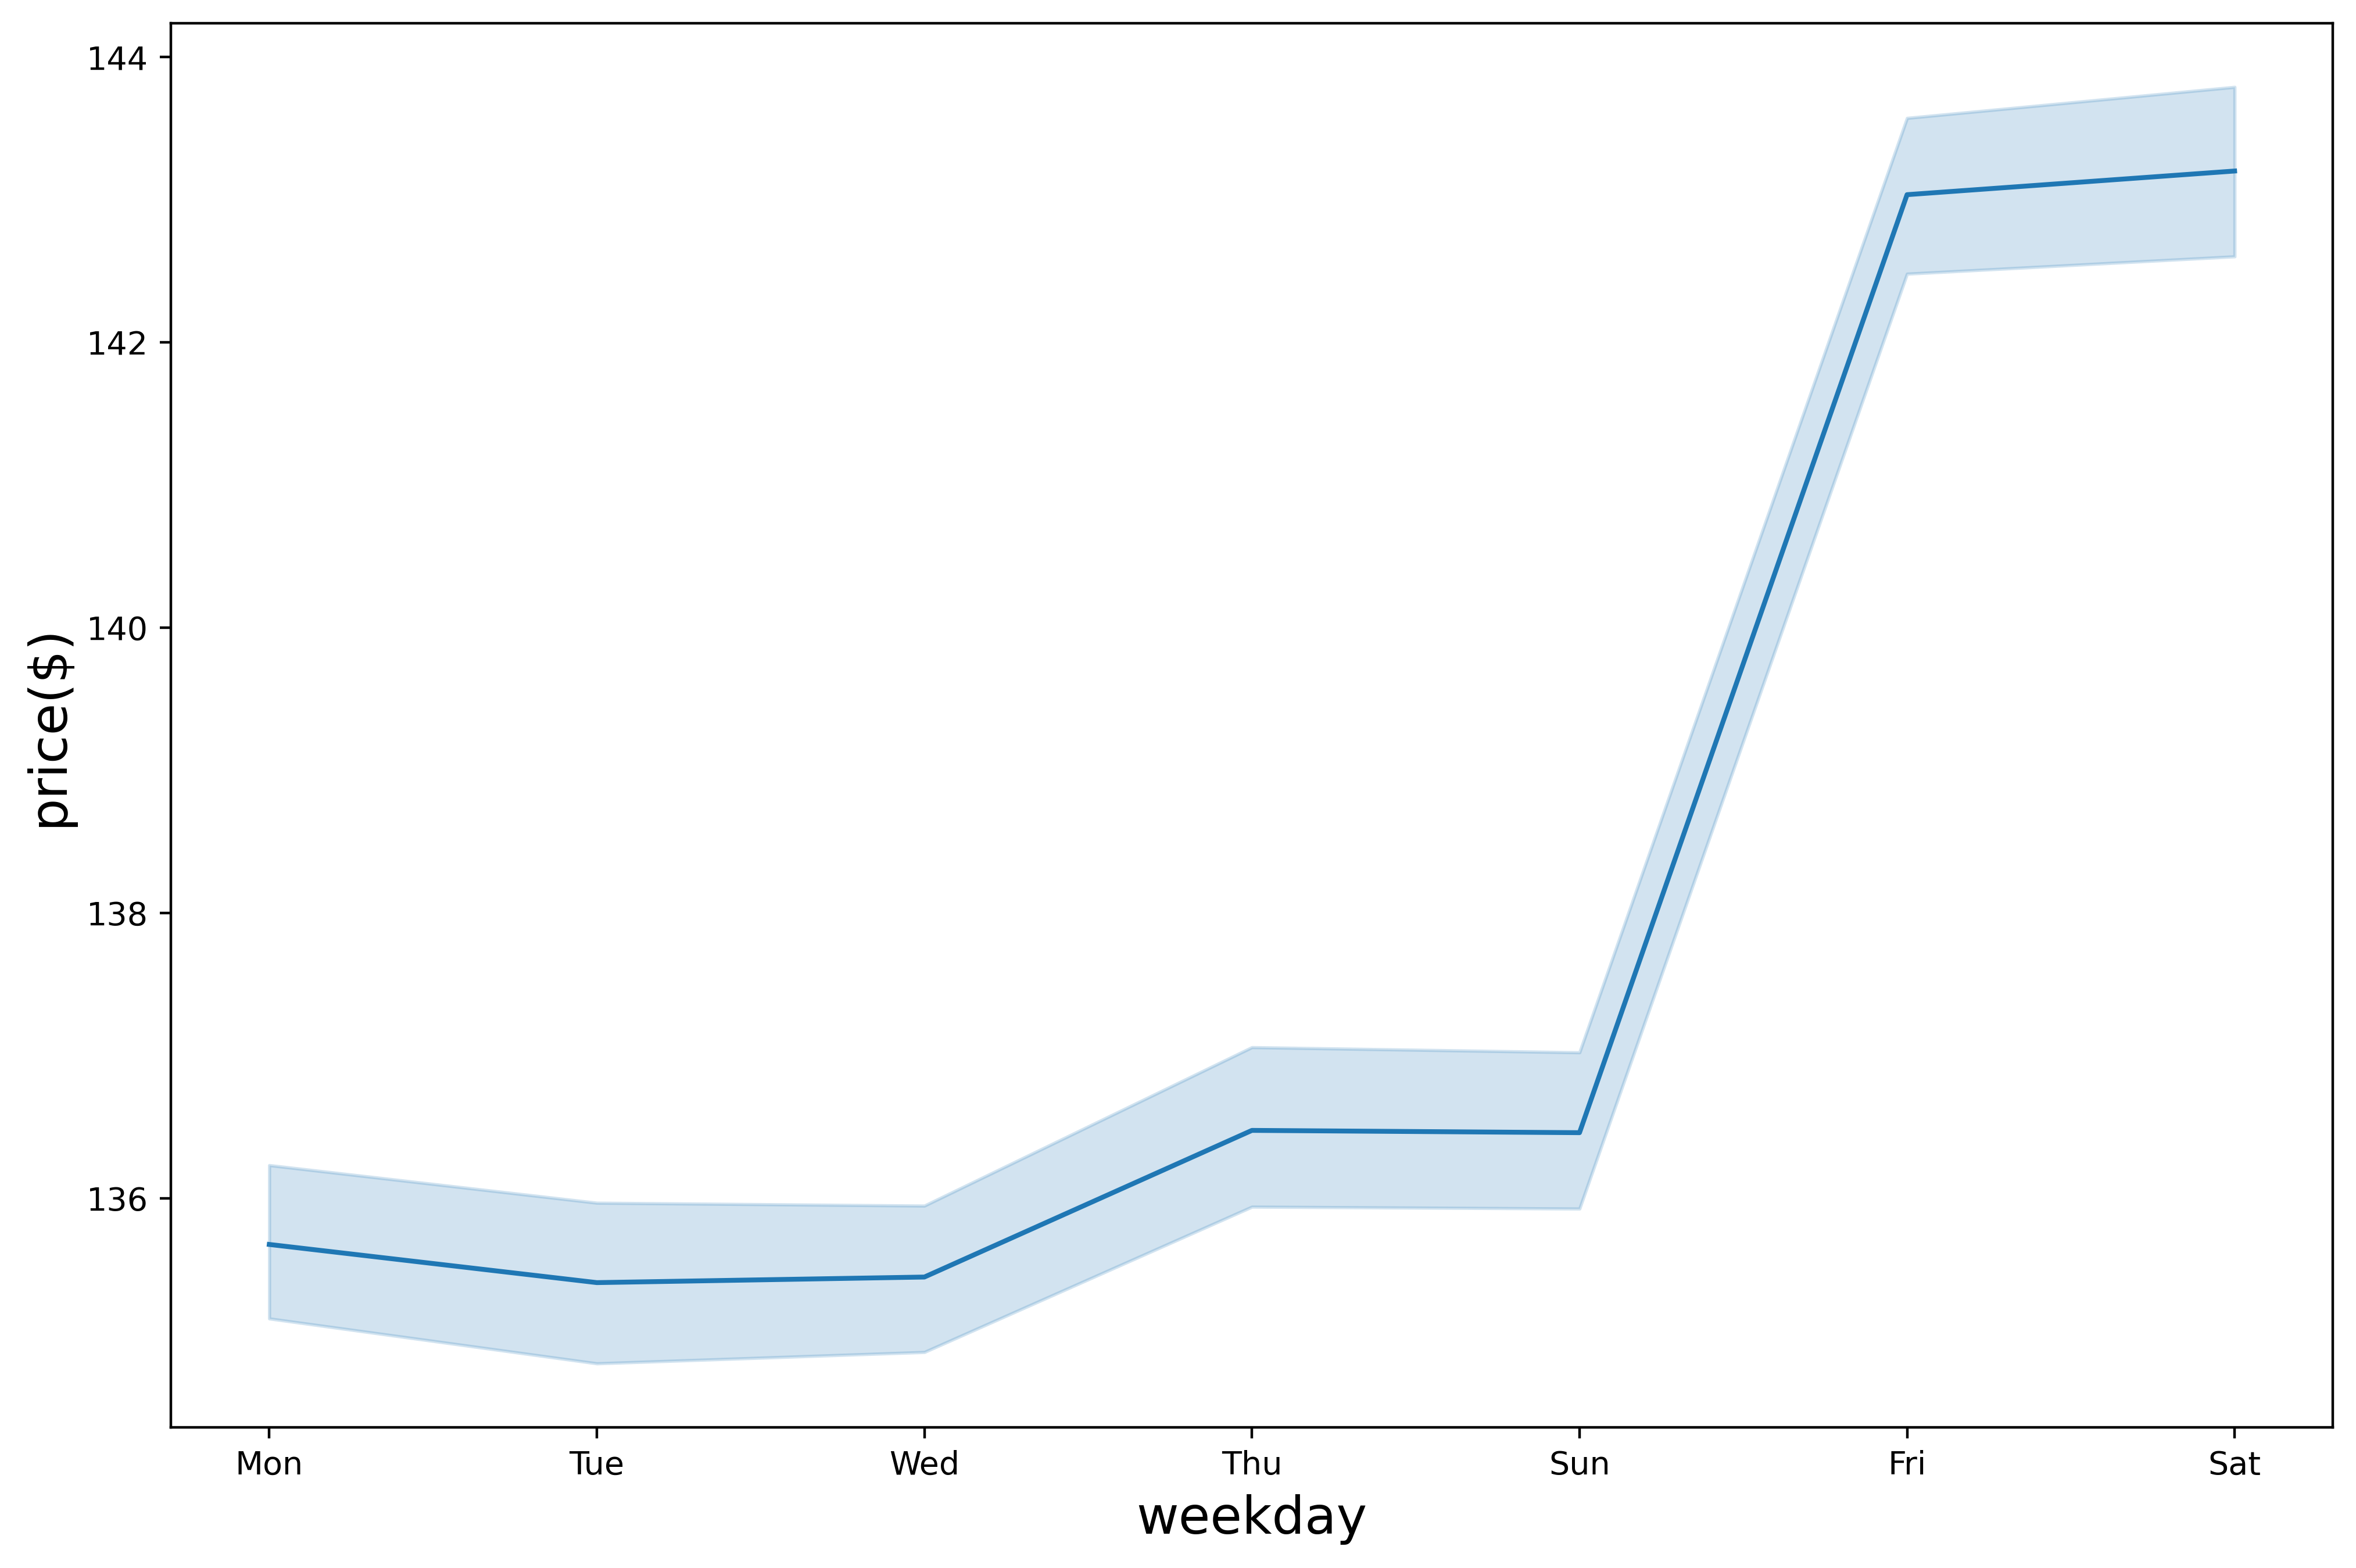

In [41]:
plt.figure(figsize=(12,8),dpi=400)
p=sns.lineplot(x='day_of_week_2',y='price',data=df6)
p.set_xlabel('weekday',fontsize=16)
p.set_ylabel('price($)',fontsize=16)
plt.savefig('date_and_price_7.png')

In [43]:
df6

,price,day_of_week_2
0,85.0,Mon
1,85.0,Tue
9,85.0,Wed
10,85.0,Thu
14,85.0,Mon
...,...,...
1393207,87.0,Wed
1393208,87.0,Thu
1393211,87.0,Sun
1393212,87.0,Mon


In [44]:
df7=df6.groupby('day_of_week_2').mean()

In [45]:
df7

,price
day_of_week_2,
Fri,143.036294
Mon,135.676414
Sat,143.202136
Sun,136.459941
Thu,136.476032
Tue,135.408764
Wed,135.447880


In [46]:
youbi = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [47]:
df8 = df7.reindex(labels=youbi)

In [48]:
df8

,price
day_of_week_2,
Mon,135.676414
Tue,135.408764
Wed,135.447880
Thu,136.476032
Fri,143.036294
Sat,143.202136
Sun,136.459941


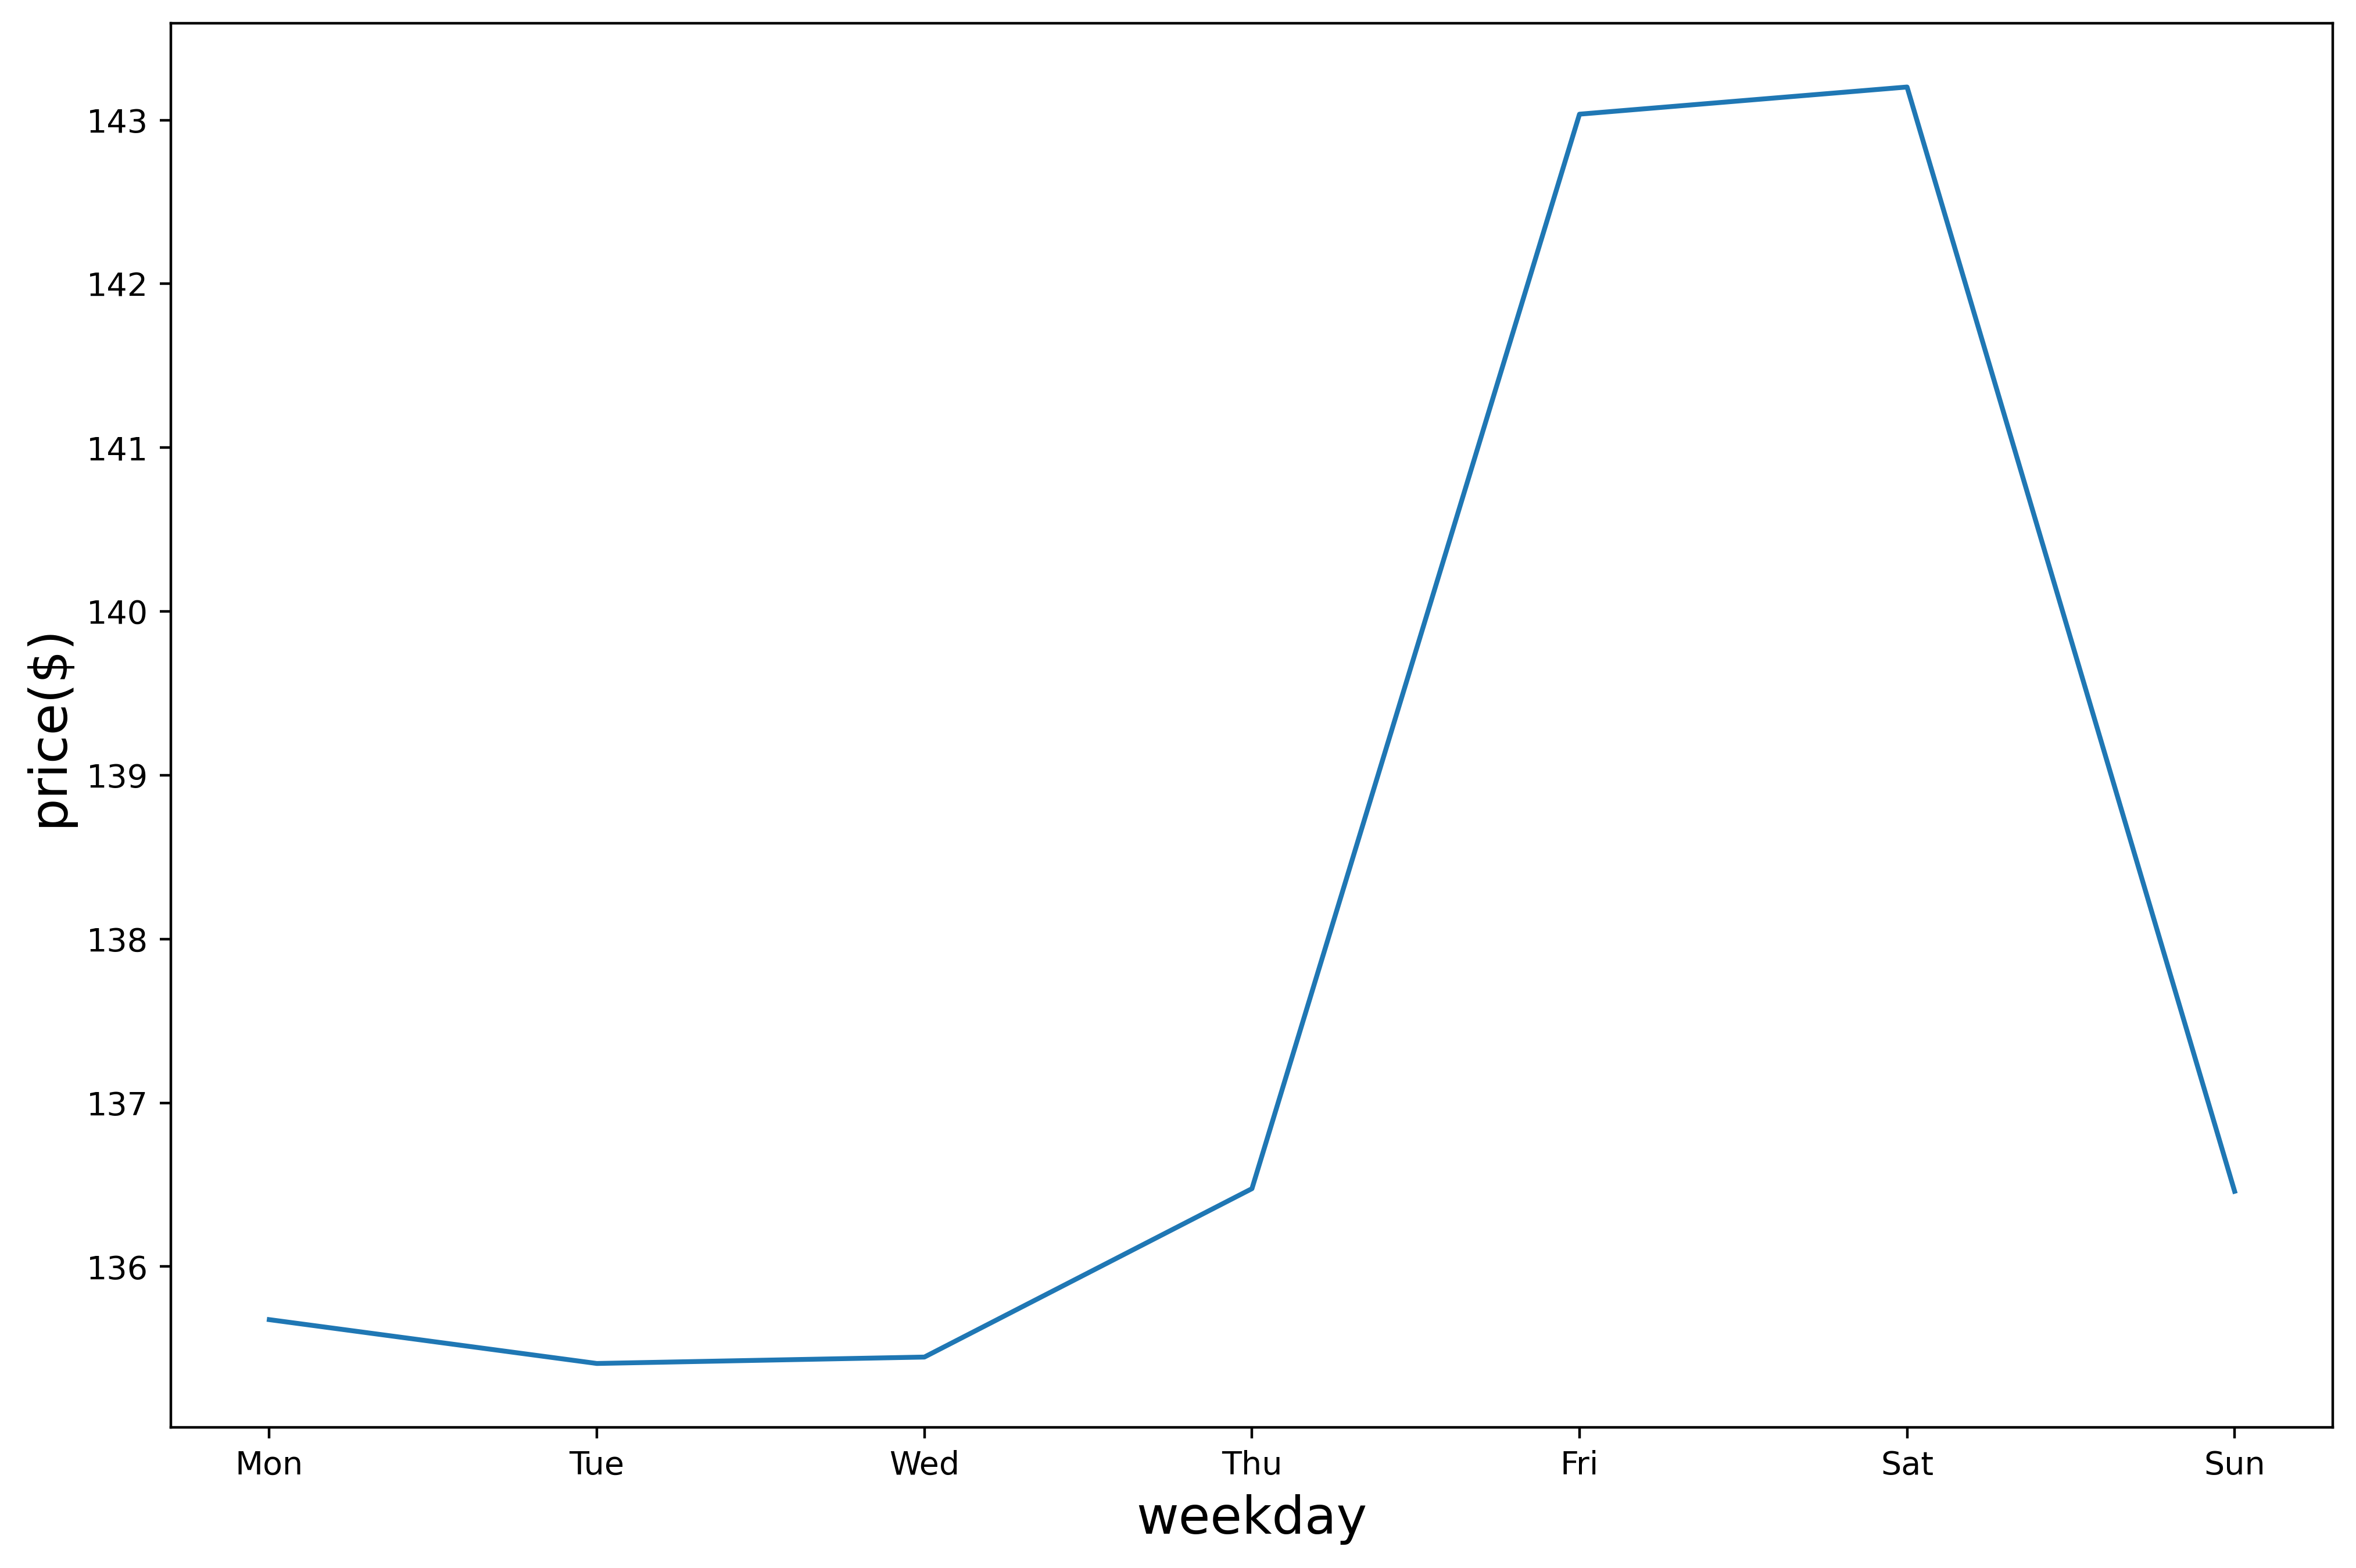

In [49]:
plt.figure(figsize=(12,8),dpi=400)
p=sns.lineplot(x='day_of_week_2',y='price',data=df8)
p.set_xlabel('weekday',fontsize=16)
p.set_ylabel('price($)',fontsize=16)
plt.savefig('date_and_price_8.png')

- **The prices on Friday and Saturday show about $10 higher than other weekdays**